# Detecting variations in the line 
Answer to:
https://stackoverflow.com/questions/53435573/how-to-detect-contiguous-spans-in-which-data-changes-linearly-within-a-dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
import numpy as np

## 1. Generate random data for toy sample
times = pd.date_range('2016-08-10', periods=100, freq='15min')
df = pd.DataFrame(np.random.randint(0,100,size=(100, 1)), index=times, columns=["data"])

## 2. Set line1 within random data
date_range1_start = "2016-08-10 08:15"
date_range1_end = "2016-08-10 15:00"
line1 = df.data[date_range1_start:date_range1_end]
value_start1 = 10
values1 = range(value_start1,value_start1+len(line1))
df.data[date_range1_start:date_range1_end] = values1

## 3. Set line2 within random data
date_range2_start = "2016-08-10 17:00"
date_range2_end = "2016-08-10 22:30"
value_start2 = 90
line2 = df.data[date_range2_start:date_range2_end]
values2 = range(value_start2,value_start2-len(line2),-1)
df.data[date_range2_start:date_range2_end] = values2


## 4. Create arrays
X = np.asarray(df.index)
X = ( X - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
X = X.reshape(-1,1)
y = np.asarray(df.data.tolist())

## 5. Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

## 6. Predict values
z = lr.predict(X)
df['linear fit'] = z

## 7. Plot
df.plot()
plt.show()

/Users/jpinzon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


<Figure size 640x480 with 1 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
import numpy as np

## 1. Generate random data for toy sample
times = pd.date_range('2016-08-10', periods=100, freq='15min')
df = pd.DataFrame(np.random.randint(0,100,size=(100, 1)), index=times, columns=["data"])

## 2. Set line1 within random data
date_range1_start = "2016-08-10 08:15"
date_range1_end = "2016-08-10 15:00"
line1 = df.data[date_range1_start:date_range1_end]
value_start1 = 10
values1 = range(value_start1,value_start1+len(line1))
df.data[date_range1_start:date_range1_end] = values1

## 3. Set line2 within random data
date_range2_start = "2016-08-10 17:00"
date_range2_end = "2016-08-10 22:30"
value_start2 = 90
line2 = df.data[date_range2_start:date_range2_end]
values2 = range(value_start2,value_start2-len(line2),-1)
df.data[date_range2_start:date_range2_end] = values2

## 4. Create arrays
X = np.asarray(df.index)
X = ( X - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
X = X.reshape(-1,1)
y = np.asarray(df.data.tolist())

## 5. Fit line using all data
lr = linear_model.RANSACRegressor(residual_threshold=0.001)
lr.fit(X, y)

# Placeholders for start/end times
start_times = []
end_times = []

# Repeat fit and check if number of span inliers is greater than 20
while np.sum(lr.inlier_mask_) > 20:

    # Remove false inliers
    lr.inlier_mask_ = np.convolve(lr.inlier_mask_.astype(int), [1,1,1], mode='same') > 1

    # Store start/end times
    in_span = np.squeeze(np.where(lr.inlier_mask_))
    start_times.append(str(times[in_span[0]]))
    end_times.append(str(times[in_span[-1]]))

    # Get outlier and check for another span
    outliers = np.logical_not(lr.inlier_mask_)
    X = X[outliers]
    y = y[outliers]
    times = times[outliers]

    # Fit to remaining points
    lr.fit(X, y)

out = pd.DataFrame({'start':start_times, 'end':end_times}, columns=['start','end'])
out.sort_values('start')

/Users/jpinzon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


,start,end
0,2016-08-10 08:15:00,2016-08-10 15:00:00
1,2016-08-10 17:00:00,2016-08-10 22:30:00


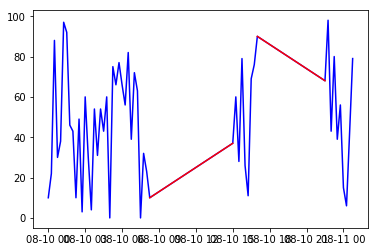

In [3]:
plt.plot(df['data'],c='b')

for idx,row in out.iterrows():
    x0 = np.datetime64(row['start'])
    y0 = df.loc[x0]['data']
    x1 = np.datetime64(row['end'])
    y1 = df.loc[x1]['data']
    plt.plot([x0,x1],[y0,y1],c='r')